# Aplicando o método CRISP-DM ao problema de negócio


# 0. Integrantes - Nome e RA
    Arthur Sanchez Fortuna | 52200221
    Arthur Carvalho de Mario | 52200220
    Luciano Duarte Gonzalez | 52200720

# 1. Estágio Um - Determine os Objetivos do Negócio e Avalie a Situação  <a class="anchor" id="Businessunderstanding"></a>
    O objetivo do programa de recomendação de filmes é criar uma ferramenta que procura maximizar o engajamento dos usuários e impulsionar a satisfação do cliente na plataforma de streaming da Netflix.

## 1.1. Avaliar a Situação Atual <a class="anchor" id="Assessthecurrentsituation"></a>

    A Netflix pode avaliar a situação do programa analisando as categorias de filmes recomendados aos usuários. Isso envolve verificar se as recomendações estão diversificadas e incluem uma ampla variedade de gêneros, como ação, comédia, drama, documentário, entre outros. Uma distribuição equilibrada das categorias pode indicar que o programa está atendendo às preferências variadas dos usuários.Também pode-se avaliar a situação do programa analisando a relevância das recomendações com base na sinopse dos filmes. Isso envolve verificar se as recomendações correspondem às preferências e interesses indicados pelos usuários por meio de suas interações com a plataforma, como buscas por filmes específicos, visualizações de trailers ou avaliações de filmes assistidos anteriormente. Ao analisar se as recomendações estão alinhadas com as expectativas dos usuários com base na sinopse dos filmes, a Netflix pode determinar a eficácia do programa em entender e atender às preferências individuais dos clientes.


### 1.1.1. Inventário de Recursos <a class="anchor" id="Inventory"></a>
- Dados: 'netflix_titles.csv'
- Recurso Computacional: windows 10 
- Software: Anaconda Navigator, Jupyter Notebook

### 1.1.2. Riscos e contingencias <a class="anchor" id="Risks"></a>
Neste trecho optamos por apresentar os possíveis riscos que podem ser apresentados após o deploy do programa e as contingências tomadas para evitar problemas futuros:

- Baixa precisão das recomendações: Se o algoritmo não for preciso o suficiente na recomendação de filmes com base na sinopse, os usuários podem ficar insatisfeitos. Contingência: Implementar continuamente o algoritmo de precisão na recomendação de filmes dos usuários para maior satisfação.

- Viés na seleção de filmes: Se o algoritmo mostrar preferência por certos tipos de filmes ou gêneros, pode alienar certos grupos de usuários. Contingência: Realize auditorias regulares no algoritmo para detectar e corrigir qualquer viés. Considere diversificar as fontes de dados para garantir uma gama mais ampla de recomendações.

- Problemas de privacidade e segurança dos dados: Se houver vazamento de dados pessoais dos usuários ou se o sistema for vulnerável a ataques cibernéticos, isso pode prejudicar a confiança dos usuários. Contingência: Implementar práticas de segurança robustas, criptografia de dados, controle de acesso e testes de segurança regulares.

- Problemas de escalabilidade: Se o número de usuários aumentar rapidamente, o sistema pode não ser capaz de lidar com a carga, resultando em lentidão ou falhas. Contingência: Adotar uma arquitetura escalável e utilize serviços em nuvem que possam lidar com aumentos repentinos na demanda. Monitore regularmente a infraestrutura e ajuste conforme necessário.

- Concorrência e mudanças no mercado: Se surgirem concorrentes com algoritmos de recomendação mais avançados ou se o mercado de streaming mudar, seu programa pode perder relevância. Contingência: Mantenha-se atualizado com as tendências do mercado e invista em pesquisa e desenvolvimento para melhorar constantemente seu algoritmo. Esteja aberto a parcerias estratégicas ou aprimoramentos de recursos para manter a competitividade.

### 1.1.3.Custos e beneficios  <a class="anchor" id="CostBenefit"></a>
- Em média o programa custa de 150MB a 300MB para se executado, medido por psutil e seu tempo de execução média é de 0.20 segundos.



 ## 1.2. Quais são as saídas desejadas do projeto? <a class="anchor" id="Desiredoutputs"></a>
 
 O programa irá disponibilizar uma recomendação de acordo com o input do usuário.

**Criterio de sucesso**
- Os filme recomendados serem adequados com o pedido do usuário

 ## 1.3. Quais perguntas estamos tentando responder? <a class="anchor" id="QA"></a>

- Como pode ser feito um programa de recomendação de filmes

# 2. Estágio dois - Compreensão dos Dados <a class="anchor" id="Dataunderstanding"></a>
    Neste estágio é onde iremos fazer as importações das bibliotecas e importar os dados da lista de filmes e sériados da Netlix, que serão usados para fazermos as pesquisas, formatação de dados e o que usaremos de base para o programa de recomendação.

## 2.1. Imports Iniciais de Dados <a class="anchor" id="Datareport"></a>

In [43]:
import re
import nltk
import time
import psutil
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from flask import Flask, request
from nltk.corpus import stopwords
import plotly.graph_objects as go

from nltk.tokenize import word_tokenize
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## 2.2. Descrição dos Dados <a class="anchor" id="Describedata"></a>
    Aqui iremos apresentar com mais detalhes os dados importados da lista de filmes e séries da Netflix.

In [44]:
path =  'Data/netflix_titles.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df =  pd.read_csv(path, sep=',') 

In [45]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [46]:
df.shape

(8807, 12)

In [47]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [48]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [50]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2.3. Checagem de qualidade dos Dados <a class="anchor" id="Verifydataquality"></a>
Os dados presentes no arquivo apresentam uma vasta variedade de filmes e seriados que ainda possuem valores nulos,caracteres especiais e entre outros onde a seguir iremos formatá-los.

### 2.3.1. Dados Ausentes <a class="anchor" id="MissingData"></a>
    Neste trecho resolvemos demonstrar os valores nulos presentes e como os removemos da lista de filmes.

In [51]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [52]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [53]:
missing_values_table(df)

Your selected dataframe has 12 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
director,2634,29.9
country,831,9.4
cast,825,9.4
date_added,10,0.1
rating,4,0.0
duration,3,0.0


In [54]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 12 columns.
There are 6 columns that have missing values.
We will remove 0 columns.


- Para evitar problemas na recomedação, melhor leitura e desenvolvimento optamos por remover os dados nulos.

In [55]:
# Drop the columns
df = df.dropna()

In [56]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## 2.4. Exploração de dados inicial  <a class="anchor" id="Exploredata"></a>
Este csv possui 12 colunas, das quais apenas 6 serão usadas, dentre elas:
- title: Nome do filme
- country: Páis de Origem
- release_year: Ano de Lnaçamento
- duration: Minutagem do Filme
- description: Sinopse do Filme
- listed_in: Genero do Filme

# 3. Estágio três - Preparação dos dados <a class="anchor" id="Datapreperation"></a>
    Como foi feito a retirada de valores nulos no trecho '2.3.1. Dados Ausentes' aqui continuaremos o pré processamento e a limpeza dos dados

## 3.1. Limpeza de Dados <a class="anchor" id="Cleansethedata"></a>

### 3.1.2. Remoção de colunas desnecessárias <a class="anchor" id="DropCols"></a>
    As colunas 'show_id','type','cast','date_added','rating', 'director' Serão removidas devido sua falta de ultilidade para criação do modelo de recomendação

In [57]:
# Dropando colunas que não serão utilizadas
df = df.drop(columns=['show_id','type','cast','date_added','rating', 'director'])

### 3.1.3. Limpeza da coluna description e duration <a class="anchor" id="DropCols"></a>

In [58]:
# Função para limpar o texto
def limpar_texto(texto):
    # Converter o texto para minúsculo
    texto = texto.lower()
    # Remover caracteres especiais
    texto = re.sub(r'[^a-z0-9]', ' ', texto)
    return texto

# Aplicar a função de limpeza ao dataframe
df['description'] = df['description'].apply(limpar_texto)
df['description']

7       on a photo shoot in ghana  an american model s...
8       a talented batch of amateur bakers face off in...
9       a woman adjusting to life after a loss contend...
12      after most of her family is murdered in a terr...
24      when the father of the man she loves insists t...
                              ...                        
8801    recovering alcoholic talal wakes up inside a s...
8802    a political cartoonist  a crime reporter and a...
8804    looking to survive in a world taken over by zo...
8805    dragged from civilian life  a former superhero...
8806    a scrappy but poor boy worms his way into a ty...
Name: description, Length: 5332, dtype: object

In [59]:
# Remover a palavra 'min' dos valores na coluna 'duration'
df['duration'] = df['duration'].str.replace(r'\bmin\b', '', regex=True)

# Criar uma máscara booleana para identificar linhas que contêm 'Season' ou 'Seasons' na coluna 'duration'
mask = df['duration'].str.contains(r'Season|Seasons', case=False)

# Dropar as linhas que correspondem à máscara
df = df[~mask]

### 3.1.4. Alterando o tipo dos dados <a class="anchor" id="AlteringDatatypes"></a>
Sometimes we may need to alter data types. Including to/from object datatypes

In [60]:
# Mudar para tipo INT
df['duration'] = df['duration'].apply(int)

### 3.1.5 Lidando com valores duplicados <a class="anchor" id="DealingDuplicates"></a>

In [61]:
# Verificando valores duplicados
df.duplicated().sum()

0

### 3.2. Renomear Colunas do DataFrame <a class="anchor" id="DropCols"></a>

In [62]:
# Renomear todas as colunas de uma vez
df = df.rename(columns={
    'title': 'Titulo',
    'release_year': 'Ano',
    'duration': 'Minutagem',
    'listed_in': 'Genero',
    'description': 'Sinopse',
    'country': "Pais"
})

In [63]:
df

,Titulo,Pais,Ano,Minutagem,Genero,Sinopse
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125,"Dramas, Independent Movies, International Movies",on a photo shoot in ghana an american model s...
9,The Starling,United States,2021,104,"Comedies, Dramas",a woman adjusting to life after a loss contend...
12,Je Suis Karl,"Germany, Czech Republic",2021,127,"Dramas, International Movies",after most of her family is murdered in a terr...
24,Jeans,India,1998,166,"Comedies, International Movies, Romantic Movies",when the father of the man she loves insists t...
27,Grown Ups,United States,2010,103,Comedies,mourning the loss of their beloved junior high...
...,...,...,...,...,...,...
8801,Zinzana,"United Arab Emirates, Jordan",2015,96,"Dramas, International Movies, Thrillers",recovering alcoholic talal wakes up inside a s...
8802,Zodiac,United States,2007,158,"Cult Movies, Dramas, Thrillers",a political cartoonist a crime reporter and a...
8804,Zombieland,United States,2009,88,"Comedies, Horror Movies",looking to survive in a world taken over by zo...
8805,Zoom,United States,2006,88,"Children & Family Movies, Comedies",dragged from civilian life a former superhero...


# 4. Estágio quatro - Análise exploratória de dados <a class="anchor" id="EDA"></a>
    Aqui neste estágio exploramos os gráficos para análise, correlações e a frequência dos dados.

In [64]:
# Converter a coluna 'Ano' para numérica
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')

# Remover os valores nulos na coluna 'Ano'
df = df.dropna(subset=['Ano'])

# Criar o gráfico de dispersão com Plotly
fig = px.scatter(df, x='Ano', y='Minutagem', title='Correlação entre Ano de Lançamento e Duração',
                 labels={'Ano': 'Ano de Lançamento', 'Minutagem': 'Duração (minutos)'},
                 opacity=0.7, trendline="ols", trendline_color_override="red")

# Personalizar o layout do gráfico
fig.update_traces(marker=dict(size=5))  # Ajusta o tamanho dos pontos
fig.update_layout(title_font_size=20, title_font_family="Arial", title_font_color="navy", title_x=0.5, title_y=0.95,
                  xaxis_title_font_size=16, yaxis_title_font_size=16, font_family="Arial", font_color="black",
                  legend_title_font_size=14, legend_font_size=12, legend_font_family="Arial")

# Exibir o gráfico
fig.show()

In [65]:
# Filtrar os filmes gravados em um único país
filmes_unico_pais = df[df['Pais'].str.count(',') == 0]

# Contagem de filmes por país
contagem_por_pais = filmes_unico_pais['Pais'].value_counts()

# Selecionar os top 10 países
top_10_paises = contagem_por_pais.head(10)

# Criar o gráfico de barras
fig = px.bar(top_10_paises, 
             x=top_10_paises.values, 
             y=top_10_paises.index, 
             orientation='h',  # Orientação horizontal
             labels={'x':'Número de Filmes', 'y':'País'},
             title='Top 10 Países com Maior Número de Filmes (Gravados em 1 Único País)',
             color=top_10_paises.values,  # Colorir as barras de acordo com o número de filmes
             color_continuous_scale='rainbow')  # Paleta de cores aleatórias
fig.update_yaxes(categoryorder='total ascending')  # Ordenar as barras de acordo com o total
fig.show()

In [66]:
# Calculando a quantidade de filmes por ano
filmes_por_ano = df['Ano'].value_counts().sort_index()

# Definindo cores RGB para as barras
cores_rgb = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 
             'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 
             'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

# Criando o gráfico de barras
fig = go.Figure()

# Adicionando as barras ao gráfico com cores diferentes para cada barra
for i, (ano, freq) in enumerate(zip(filmes_por_ano.index, filmes_por_ano.values)):
    fig.add_trace(go.Bar(x=[ano], y=[freq], marker_color=cores_rgb[i % len(cores_rgb)]))

# Atualizando o layout do gráfico
fig.update_layout(title='Distribuição de Filmes por Ano',
                  xaxis_title='Ano',
                  yaxis_title='Frequência',
                  xaxis=dict(tickangle=-45, tickmode='linear', tick0=1940, dtick=5),  # Definindo intervalo de 5 anos
                  height=600,  # Altura do gráfico
                  width=1130,  # Largura do gráfico
                  showlegend=False,
                  margin=dict(l=100, r=100, t=50, b=50))  # Definindo as margens

# Mostrando o gráfico
fig.show()

In [67]:
# Ordenar a contagem de gêneros do menor para o maior
genero_contagem = df['Genero'].str.split(', ', expand=True).stack().value_counts()
genero_contagem = genero_contagem.sort_values()

# Definindo uma paleta de cores
cores_rgb = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 
             'rgb(148, 103, 189)', 'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 
             'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

# Criando o gráfico de barras
fig = go.Figure()

# Adicionando as barras ao gráfico com cores diferentes para cada barra
for i, (genero, contagem) in enumerate(zip(genero_contagem.index, genero_contagem.values)):
    fig.add_trace(go.Bar(x=[genero], y=[contagem], marker_color=cores_rgb[i % len(cores_rgb)]))

# Atualizando o layout do gráfico
fig.update_layout(title='Contagem de Títulos por Gênero (1942-2021)',
                  xaxis_title='Gênero',
                  yaxis_title='Contagem de Títulos',
                  xaxis=dict(tickangle=-45, tickmode='array', tickvals=genero_contagem.index, ticktext=genero_contagem.index),  # Definindo texto do eixo x
                  height=600,  # Altura do gráfico
                  width=1130,  # Largura do gráfico
                  showlegend=False,
                  margin=dict(l=100, r=100, t=50, b=50))  # Definindo as margens

# Mostrando o gráfico
fig.show()

In [68]:
# Ordenar a contagem de gêneros do menor para o maior
genero_contagem = df['Genero'].str.split(', ', expand=True).stack().value_counts()
genero_contagem = genero_contagem.sort_values()

# Criando o gráfico de pizza
fig = go.Figure()

# Adicionando as fatias de pizza ao gráfico
fig.add_trace(go.Pie(labels=genero_contagem.index, values=genero_contagem.values))

# Atualizando o layout do gráfico
fig.update_layout(title='Contagem de Títulos por Gênero (1942-2021)',
                  height=600,  # Altura do gráfico
                  width=1100)  # Largura do gráfico

# Mostrando o gráfico
fig.show()

In [69]:
# Agrupamento por ano e contagem de gêneros
generos_por_ano = df.groupby('Ano')['Genero'].apply(lambda x: ','.join(x)).reset_index()

# Criando um dataframe com dummies para os gêneros
generos_dummies = generos_por_ano['Genero'].str.get_dummies(sep=',')

# Lista de anos
anos = generos_por_ano['Ano']

# Criando lista de figuras para os subplots
fig = go.Figure()

# Adicionando um trace para cada gênero
for genero in generos_dummies.columns:
    fig.add_trace(go.Bar(x=anos, y=generos_dummies[genero], name=genero, showlegend=False))

# Atualizando o layout do gráfico
fig.update_layout(
    title='Distribuição de Gêneros por Ano',
    xaxis_title='Ano',
    yaxis_title='Contagem de Títulos',
    xaxis=dict(tickangle=-45, dtick=5),  # Definindo o intervalo de tick como 1 para mostrar todos os anos
    barmode='stack',
    height=600,  # Altura do gráfico
    width=1100,  # Largura do gráfico
    margin=dict(l=10, r=10, t=50, b=50)  # Margens (esquerda, direita, topo, baixo)
)

# Mostrando o gráfico
fig.show()

In [70]:
# Contar quantos gêneros únicos existem no DataFrame
generos_unicos = df['Genero'].str.split(', ').explode().unique()
numero_de_generos = len(generos_unicos)

# Selecionar apenas os dados que possuem um único gênero na coluna "Genero"
dados_um_genero = df[df['Genero'].str.split(', ').apply(len) == 1]

print("Número de gêneros únicos:", numero_de_generos)
print("Dados com apenas um gênero na coluna 'Genero':")
dados_um_genero

Número de gêneros únicos: 20
Dados com apenas um gênero na coluna 'Genero':


,Titulo,Pais,Ano,Minutagem,Genero,Sinopse
27,Grown Ups,United States,2010,103,Comedies,mourning the loss of their beloved junior high...
29,Paranoia,"United States, India, France",2013,106,Thrillers,blackmailed by his company s ceo a low level ...
46,Safe House,"South Africa, United States, Japan",2012,115,Action & Adventure,young cia operative matt weston must get a dan...
81,Kate,United States,2021,106,Action & Adventure,slipped a fatal poison on her final job a rut...
122,In the Cut,"United Kingdom, Australia, France, United States",2003,118,Thrillers,after embarking on an affair with the cop prob...
...,...,...,...,...,...,...
8737,Why Are We Getting So Fat?,United Kingdom,2016,50,Documentaries,a cambridge geneticist dispels misconceptions ...
8764,Wyatt Earp,United States,1994,191,Action & Adventure,legendary lawman wyatt earp is continually at ...
8765,XX,"Canada, United States",2017,81,Horror Movies,this four part anthology of short horror films...
8767,XXX: State of the Union,United States,2005,101,Action & Adventure,in this action packed follow up to xxx u s i...


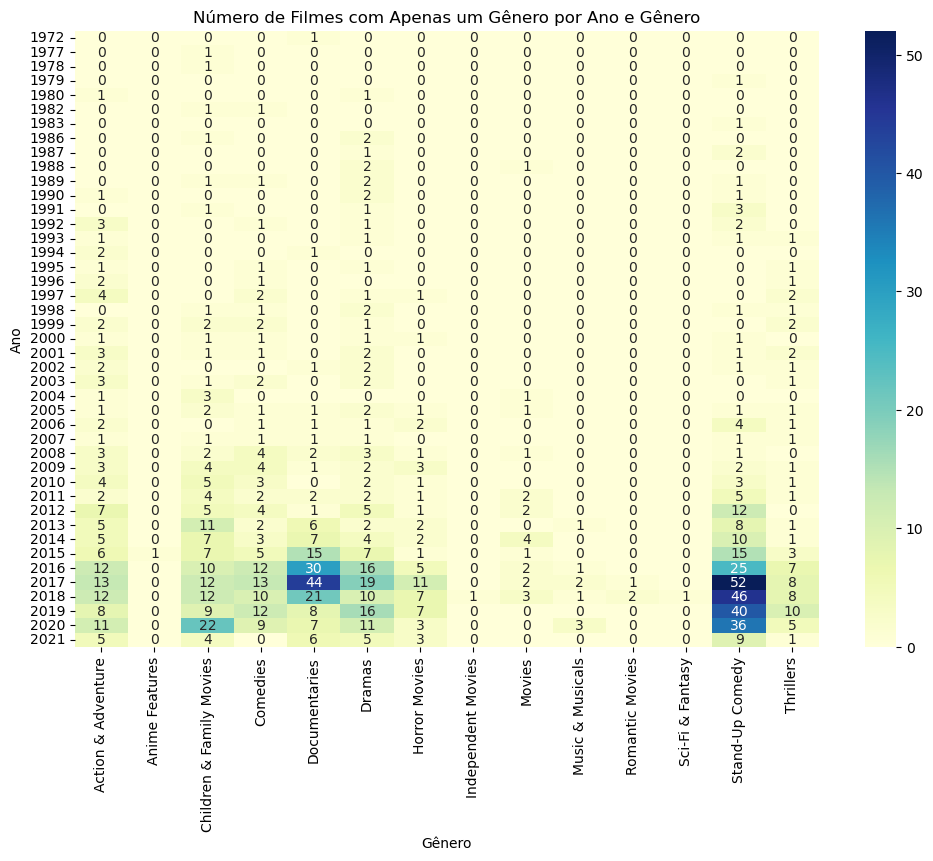

In [71]:
# Agrupar os dados por Ano e Genero e contar o número de filmes
heatmap_data = dados_um_genero.groupby(['Ano', 'Genero']).size().unstack(fill_value=0)

# Plotar o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Número de Filmes com Apenas um Gênero por Ano e Gênero')
plt.xlabel('Gênero')
plt.ylabel('Ano')
plt.show()

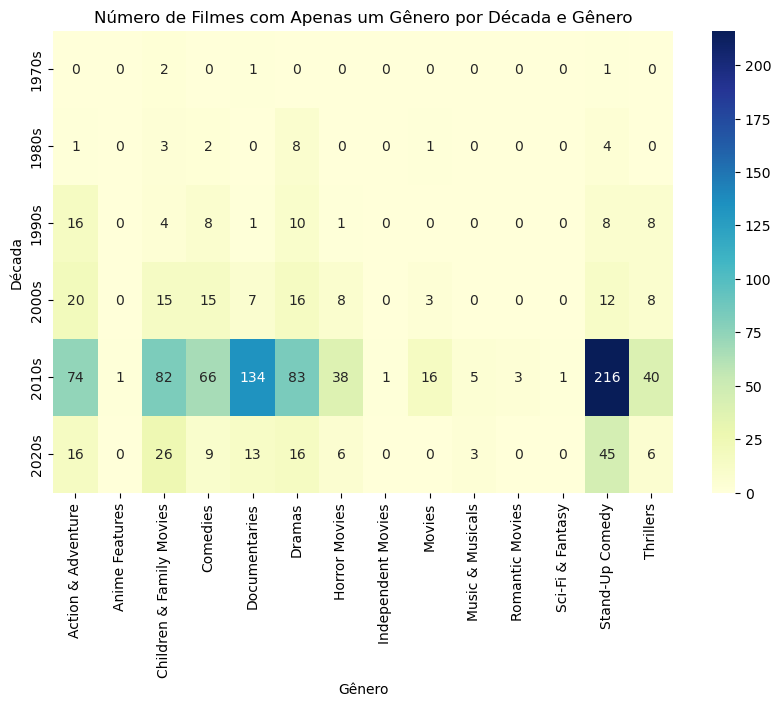

In [72]:
# Função para calcular a década correspondente a um determinado ano
def calcular_decada(ano):
    return str(ano // 10 * 10) + "s"

# Criar uma nova coluna 'Decada' com base no ano
dados_um_genero['Decada'] = dados_um_genero['Ano'].apply(calcular_decada)

# Agrupar os dados por Decada e Genero e contar o número de filmes
heatmap_data = dados_um_genero.groupby(['Decada', 'Genero']).size().unstack(fill_value=0)

# Plotar o mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Número de Filmes com Apenas um Gênero por Década e Gênero')
plt.xlabel('Gênero')
plt.ylabel('Década')
plt.show()

In [73]:
# Dividir os gêneros em uma lista e expandir o DataFrame
generos_expandidos = df['Genero'].str.split(', ', expand=True)

# Concatenar os gêneros expandidos com o DataFrame original
df_expandido = pd.concat([df, generos_expandidos], axis=1)

# Mapear as colunas geradas para um único nome de gênero
df_expandido = df_expandido.melt(id_vars=['Titulo', 'Ano', 'Minutagem', 'Sinopse'], value_vars=[0, 1, 2], value_name='Genero')

# Remover linhas com valores nulos na coluna 'Genero'
df_expandido.dropna(subset=['Genero'], inplace=True)

# Exibir as primeiras linhas do DataFrame expandido
df_expandido

,Titulo,Ano,Minutagem,Sinopse,variable,Genero
0,Sankofa,1993,125,on a photo shoot in ghana an american model s...,0,Dramas
1,The Starling,2021,104,a woman adjusting to life after a loss contend...,0,Comedies
2,Je Suis Karl,2021,127,after most of her family is murdered in a terr...,0,Dramas
3,Jeans,1998,166,when the father of the man she loves insists t...,0,Comedies
4,Grown Ups,2010,103,mourning the loss of their beloved junior high...,0,Comedies
...,...,...,...,...,...,...
15547,اشتباك,2016,98,amid the tumult following egyptian president m...,2,International Movies
15548,Zed Plus,2014,131,a philandering small town mechanic s political...,2,International Movies
15550,Zinzana,2015,96,recovering alcoholic talal wakes up inside a s...,2,Thrillers
15551,Zodiac,2007,158,a political cartoonist a crime reporter and a...,2,Thrillers


In [74]:
# Lista vazia para armazenar os trace do boxplot
data = []

# Iterar sobre os gêneros únicos
for genero in df_expandido['Genero'].unique():
    # Selecionar os dados de duração para o gênero atual
    dados_genero = df_expandido[df_expandido['Genero'] == genero]['Minutagem']
    # Adicionar um trace de boxplot para o gênero atual
    data.append(go.Box(y=dados_genero, name=genero))

# Layout do gráfico
layout = go.Layout(title='Duração dos Filmes por Gênero',
                   yaxis=dict(title='Duração (minutos)'),
                   boxmode='group')  # Para agrupar os boxplots lado a lado

# Criar a figura e mostrar o gráfico
fig = go.Figure(data=data, layout=layout)
fig.show()

In [75]:
# Calcular a média da duração dos filmes por década e gênero
media_por_decada_genero = df_expandido.groupby([df_expandido['Ano'] // 10 * 10, 'Genero'])['Minutagem'].mean().reset_index()

# Lista vazia para armazenar os trace do boxplot
data = []

# Iterar sobre os gêneros únicos
for genero in media_por_decada_genero['Genero'].unique():
    # Selecionar os dados de média de duração para o gênero atual
    dados_genero = media_por_decada_genero[media_por_decada_genero['Genero'] == genero]
    # Adicionar um trace de boxplot para a média de duração do gênero atual
    data.append(go.Box(y=dados_genero['Minutagem'], name=genero, line=dict(width=8)))  # Ajuste da espessura da linha

# Layout do gráfico
layout = go.Layout(title='Média da Duração dos Filmes por Gênero e Década',
                   yaxis=dict(title='Duração Média (minutos)'),
                   boxmode='group')  # Para agrupar os boxplots lado a lado

# Criar a figura e mostrar o gráfico
fig = go.Figure(data=data, layout=layout)
fig.show()

# 5. Estágio cinco - Modelagem <a class="anchor" id="Modelling"></a>
    Neste estágio será feita a modelagem, que métodos foram utilizados e quais modelos nos baseamos.


## 5.1. Técnica de modelagem <a class="anchor" id="ModellingTechnique"></a>
- Filtragem Baseada em Conteúdo (Content-Based Filtering)

### 5.1.1 Criação do modelo KNN <a class="anchor" id="ModellingTechnique"></a>

    Nesta etapa, estaremos criando e treinado o modelo KNN para a recomendação de dados.

    De início, criamos um Dataframe com a junção dos 3 parâmetros que deverão ser levado em consideração para a recomendação dos filmes. Estes sendo Título, Sinopse e Gênero.

    Após isso, vetorizamos esses valores para converter o texto em recursos numéricos e treinamos nosso modelo KNN utilizado a métrica de cosseno.

    Agora que temos o modelo treinado e os dados vetorizados, criamos a função responsável por realizar a recomendação do filmes. Ela inicia recebendo uma string com a entrada do usuário, a vetorizando logo em seguida. Após isso, ela busca a partir dos neighbors do modelo KNN os filmes que são mais próximos da entrada do usuário e, com as recomendações em mãos, é criado um novo Dataframe com os filmes recomendados.



In [76]:
# Início da contagem de tempo
start_time = time.time()

# Função para medir o uso de memória
def memory_usage():
    # Obtém o uso de memória atual em MB
    mem_usage_mb = psutil.Process().memory_info().rss / 1024 / 1024
    return mem_usage_mb

# Imprime o uso de memória inicial
print("Uso de memória inicial:", memory_usage(), "MB")

# 3. Combinar título, sinopse e gênero em uma única coluna
df['Features'] = df['Titulo'] + ' ' + df['Sinopse'] + ' ' + df['Genero'] + ' ' + df['Pais'] + ' ' + df['Ano'].astype(str) + ' ' + df['Minutagem'].astype(str)

# Imprime o uso de memória após carregar o DataFrame
print("Uso de memória após carregar DataFrame:", memory_usage(), "MB")

# Criar um vetorizador TF-IDF para converter o texto em recursos numéricos
vectorizer = TfidfVectorizer(stop_words='english')  
X = vectorizer.fit_transform(df['Features'])

# Imprime o uso de memória após criar o vetorizador TF-IDF
print("Uso de memória após criar o vetorizador TF-IDF:", memory_usage(), "MB")

# Criar e treinar o modelo KNN
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)

# Imprime o uso de memória após criar e treinar o modelo KNN
print("Uso de memória após criar e treinar o modelo KNN:", memory_usage(), "MB")

# Função para recomendar filmes com base na entrada do usuário
def recommend_movies(user_input):
    # Vetorizar a entrada do usuário
    entrada_usuario_vector = vectorizer.transform([user_input])

    # Encontrar os filmes mais próximos da entrada do usuário
    distances, indices = knn.kneighbors(entrada_usuario_vector)
    
    # Criar um DataFrame com os filmes recomendados
    recommended_movies_df = df.iloc[indices[0]][['Titulo', 'Sinopse', 'Genero']] # SÃO AS COLUNAS QUE INTERESSAM + PRO USUARIO

    return recommended_movies_df

# Entrada do usuário
user_input = "Naruto"

# Recomendar filmes com base na entrada do usuário
recommended_movies = recommend_movies(user_input)

# Exibir os títulos e sinopses dos filmes recomendados
print(recommended_movies)

# Fim da contagem de tempo
end_time = time.time()

# Tempo total de execução
execution_time = end_time - start_time
print("Tempo de execução:", execution_time, "segundos")

# Uso de memória final
print("Uso de memória final:", memory_usage(), "MB")

Uso de memória inicial: 294.3046875 MB
Uso de memória após carregar DataFrame: 295.1015625 MB
Uso de memória após criar o vetorizador TF-IDF: 299.515625 MB
Uso de memória após criar e treinar o modelo KNN: 299.515625 MB
                                                 Titulo  \
59                          Naruto Shippuden: The Movie   
63    Naruto the Movie: Ninja Clash in the Land of Snow   
57                    Naruto Shippûden the Movie: Bonds   
7559                    Naruto Shippuden : Blood Prison   
60          Naruto Shippuden: The Movie: The Lost Tower   

                                                Sinopse  \
59    the adventures of adolescent ninja naruto uzum...   
63    naruto  sasuke and sakura learn they ll be pro...   
57    when strange ninjas ambush the village of kono...   
7559  mistakenly accused of an attack on the fourth ...   
60    when naruto is sent to recover a missing nin  ...   

                                                 Genero  
59    Action

    Um ponto importante a ressaltar é a limitação do modelo em relação a buscas fora do escopo da base de dados. Pois caso o usuário informe um input de uma palavra incompleta e/ou que não esteja de acordo com os filmes presentes dentro do Dataset, a aplicação retorna uma lista padrão de recomendação que não necessariamente é próxima da entrada do usuário.

### 5.1.2. Acuracia e matriz de confusão por Genero <a class="anchor" id="ModellingTechnique"></a>
    Nesta etapa, realizamos a criação de uma matriz de confusão utilizando os Gêneros dos filmes como padrão e determinamos sua acurárcia. Optamos por utilizar esse parâmetro para que possamos ter uma noção melhor do quanto os gêneros dos filmes podem influênciar positivamente e negativamente a acurácia dos resultados da recomendação dos filmes.



In [77]:
# Filtrar filmes com gênero único
df = df[df['Genero'].apply(lambda x: len(x.split(',')) == 1)]

# Dividir os dados em conjunto de treinamento e teste
X = df.drop('Genero', axis=1)
y = df['Genero']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vetorizar a sinopse usando TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train['Sinopse'])
X_test = vectorizer.transform(X_test['Sinopse'])

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Avaliar o modelo
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculando manualmente os valores de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos
tp = conf_matrix[1, 1]
fp = conf_matrix[0, 1]
tn = conf_matrix[0, 0]
fn = conf_matrix[1, 0]

# Imprimir os valores de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos
print("Verdadeiros Positivos:", tp)
print("Falsos Positivos:", fp)
print("Verdadeiros Negativos:", tn)
print("Falsos Negativos:", fn)

# Calcular métricas de precisão, recall e F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir métricas
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Acurácia:", accuracy)


# Plotar a matriz de confusão usando Plotly
fig = go.Figure(data=go.Heatmap(z=conf_matrix,
                                 x=knn.classes_,
                                 y=knn.classes_,
                                 colorscale='Blues',
                                 colorbar=dict(title='Contagem'),
                                 hoverongaps=False))
fig.update_layout(title='Matriz de Confusão',
                  xaxis=dict(title='Gênero Previsto', automargin=True),
                  yaxis=dict(title='Gênero Verdadeiro', automargin=True),
                  width=800, height=600,
                  font=dict(size=12),
                  plot_bgcolor='rgba(0, 0, 0, 0)',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Rockwell"))
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[0])):
        if conf_matrix[i][j] != 0:
            fig.add_annotation(x=knn.classes_[j], y=knn.classes_[i], text=str(conf_matrix[i][j]),
                               showarrow=False, font=dict(color='black', size=12))
fig.show()

Verdadeiros Positivos: 17
Falsos Positivos: 0
Verdadeiros Negativos: 15
Falsos Negativos: 1
Precisão: 0.535324327001272
Recall: 0.5622119815668203
F1-score: 0.540210840610103
Acurácia: 0.5622119815668203


## 5.2. Modelo de acesso (API) <a class="anchor" id="AssessModel"></a>

    Na etapa final, implementamos o modelo KNN junto do sistema de recomendação de filmes dentro de uma API Flask para que seja possível um usuário resgatar recomendações de forma dinâmica, como se estivesse realmente em um serviço de Streaming de filmes como a Netflix. 

    A Aplicação possui apenas uma única rota GET, sendo esta a responsável por passar a entrada do usuário para que a busca de recomendação seja feita e retornada para o mesmo em formato de HTML. A escolha para o retorno de dados ser em HTML se deve pela maior facilidade de se visualizar as recomendações obtidas, podendo serem visualizadas diretamente do navegador ao acessarem a url `http://localhost:8080/recommend?input=Romantic`

    Caso o usuário não envie um input, a aplicação retornará um BAD REQUEST (Erro 400) junto de uma mensagem informando a falta do input.

In [ ]:
# Inicializar o aplicativo Flask
app = Flask(__name__)

# Carregar o DataFrame com os dados dos filmes
df = pd.read_csv('Models/dados.csv')

# Combinar título, sinopse e gênero em uma única coluna
df['Features'] = df['Titulo'] + ' ' + df['Sinopse'] + ' ' + df['Genero'] + ' ' + df['Pais'] + ' ' + df['Ano'].astype(
    str) + ' ' + df['Minutagem'].astype(str)

# Criar um vetorizador TF-IDF para converter o texto em recursos numéricos
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Features'])

# Criar e treinar o modelo KNN
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)


# Função para recomendar filmes com base na entrada do usuário
def recommend_movies(user_input):
    # Vetorizar a entrada do usuário
    entrada_usuario_vector = vectorizer.transform([user_input])

    # Encontrar os filmes mais próximos da entrada do usuário
    distances, indices = knn.kneighbors(entrada_usuario_vector)

    # Criar um DataFrame com os filmes recomendados
    recommended_movies_df = df.iloc[indices[0]][['Titulo', 'Sinopse', 'Genero']]

    return recommended_movies_df


@app.route('/recommend', methods=['GET'])
def get_recommendations():
    # Obter a entrada do usuário da query string
    user_input = request.args.get('input')

    # Verificar se a entrada do usuário está presente
    if not user_input:
        return 'No input provided', 400

    # Obter recomendações com base na entrada do usuário
    recommended_movies = recommend_movies(user_input)

    # Criar uma tabela HTML com os filmes recomendados
    html_content = """
    <html>
    <head>
        <title>Filmes Recomendados</title>
        <style>
            table {
                font-family: Arial, sans-serif;
                border-collapse: collapse;
                width: 100%;
            }
            th, td {
                border: 1px solid #dddddd;
                text-align: left;
                padding: 8px;
            }
            th {
                background-color: #f2f2f2;
            }
        </style>
    </head>
    <body>
        <h1>Filmes Recomendados</h1>
        <table>
            <tr>
                <th>Título</th>
                <th>Sinopse</th>
                <th>Gênero</th>
            </tr>
    """

    # Iterar sobre os filmes recomendados e adicioná-los à tabela HTML
    for index, movie in recommended_movies.iterrows():
        html_content += f"<tr>"
        html_content += f"<td>{movie['Titulo']}</td>"
        html_content += f"<td>{movie['Sinopse']}</td>"
        html_content += f"<td>{movie['Genero']}</td>"
        html_content += f"</tr>"

    html_content += """
        </table>
    </body>
    </html>
    """

    # Retornar a tabela HTML como resposta
    return html_content


# Executar o aplicativo Flask
if __name__ == '__main__':
    host = 'localhost'
    port = 8080
    print(f"Aplicação rodando em http://{host}:{port}/")
    app.run(debug=True, use_reloader=True, host=host, port=port)